In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# data = 'https://raw.githubusercontent.com/bruno-lima98/ml-zoomcamp-homework/refs/heads/main/01-classes/02-regression/housing_data.csv'
# !wget $data
df = pd.read_csv('housing_data.csv')
df.head()

--2025-09-01 22:08:30--  https://raw.githubusercontent.com/bruno-lima98/ml-zoomcamp-homework/refs/heads/main/01-classes/02-regression/housing_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29981 (29K) [text/plain]
Saving to: ‘housing_data.csv’

housing_data.csv    100%[===================>]  29.28K  --.-KB/s    in 0.001s  

2025-09-01 22:08:30 (30.0 MB/s) - ‘housing_data.csv’ saved [29981/29981]



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
str_col = list(df.dtypes[df.dtypes=='object'].index)

for i in str_col:
    df[i] = df[i].str.lower().str.replace('-','_')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi_furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [30]:
for i in str_col:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())

mainroad
['yes' 'no']
2
guestroom
['no' 'yes']
2
basement
['no' 'yes']
2
hotwaterheating
['no' 'yes']
2
airconditioning
['yes' 'no']
2
prefarea
['yes' 'no']
2
furnishingstatus
['furnished' 'semi_furnished' 'unfurnished']
3


<Axes: xlabel='price', ylabel='Count'>

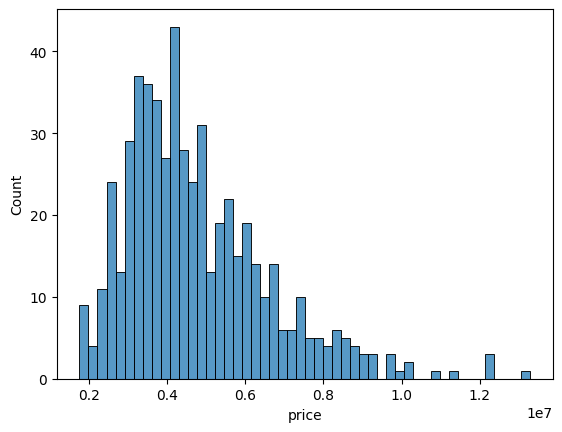

In [35]:
sns.histplot(df['price'],bins=50)

<Axes: xlabel='price', ylabel='Count'>

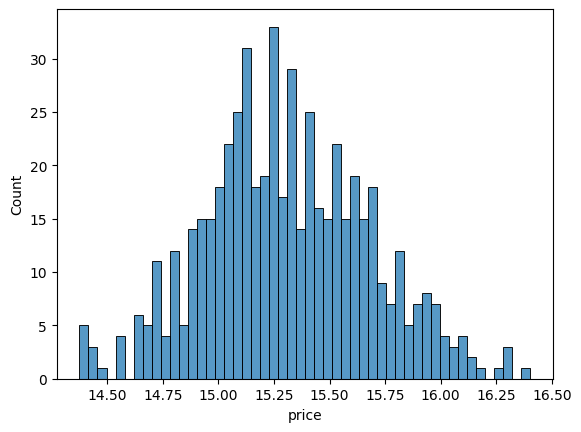

In [34]:
sns.histplot(np.log1p(df['price']),bins=50)

### Validation FW

In [134]:
cat_bin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[cat_bin] = df[cat_bin].replace({'yes':1, 'no':0})


In [135]:
n = len(df)
n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - n_train - n_val

n, n_train, n_val, n_test, n_train + n_val + n_test

(545, 327, 109, 109, 545)

In [136]:
ipx = np.arange(n)
np.random.seed(15)
np.random.shuffle(ipx)

In [137]:
df_train = df.iloc[ipx[:n_train]]
df_val = df.iloc[ipx[n_train:n_train+n_val]]
df_test = df.iloc[ipx[n_train+n_val:]]

len(df) ,len(df_train), len(df_val), len(df_test), len(df_train) + len(df_val) + len(df_test)

(545, 327, 109, 109, 545)

In [138]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [139]:
y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

In [140]:
del df_train['price']
del df_val['price']
del df_test['price']

### Linear Regression

In [75]:
def prepare_X(df):
    X = df[base].fillna(0).values

    return X

In [81]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [160]:
def rmse(y,y_pred):
    error = np.sqrt(((y_pred - y)**2).mean())
    return (f'{(error*100).round(4)} %')

In [141]:
base = ['area']
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [142]:
y_pred_train = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

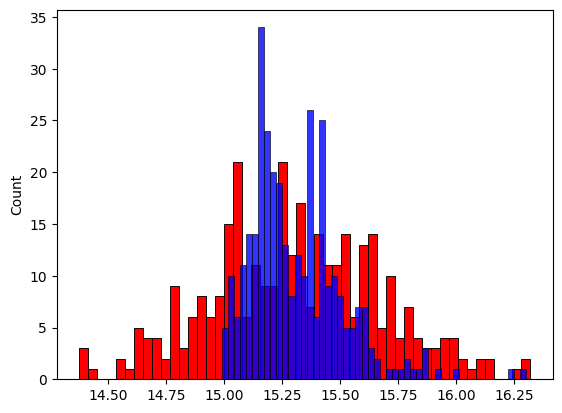

In [143]:
sns.histplot(y_train,bins=50,alpha=1,color='red')
sns.histplot(y_pred_train,bins=50,alpha=0.8,color='blue')

In [144]:
rmse(y_train,y_pred_train)

31.1149 %


### Categorical Variables

In [145]:
def prepare_X_cat(df):
    df = df.copy()
    features = base.copy()

    for c, values in categories.items():
        for i in values:
            df['%s_%s' % (c,i)] = (df[c] == i).astype('int')
            features.append('%s_%s' % (c,i))

    features.extend(cat_bin)

    X = df[features].fillna(0).values

    return X

In [123]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [ ]:
cat_bin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']


In [148]:
cat_features = ['bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus']

categories = {}

for i in cat_features:
    categories[i] = list(df[i].value_counts().index)

categories

{'bedrooms': [3, 2, 4, 5, 6, 1],
 'bathrooms': [1, 2, 3, 4],
 'stories': [2, 1, 4, 3],
 'parking': [0, 1, 2, 3],
 'furnishingstatus': ['semi_furnished', 'unfurnished', 'furnished']}

In [129]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi_furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [153]:
X_train = prepare_X_cat(df_train)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.01)
y_pred_train = w0 + X_train.dot(w)

In [167]:
par = []
for i in range (10):
    par.append(100/(10**i))

for i in par:
    X_train = prepare_X_cat(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r=i)
    y_pred_train = w0 + X_train.dot(w)

    X_val = prepare_X_cat(df_val)
    y_pred_val = w0 + X_val.dot(w)
    X_test = prepare_X_cat(df_test)
    y_pred_test = w0 + X_test.dot(w)

    score_val = rmse(y_val,y_pred_val)
    score_test = rmse(y_test,y_pred_test)

    print(f'Parâmetro r = {i:>6} | RMSE_Val = {score_val:>10} | RMSE_Test = {score_test:>10} | w0 = {w0.round(4)}')

# r = 0.0001 

Parâmetro r =  100.0 | RMSE_Val = 227.1275 % | RMSE_Test = 237.6229 % | w0 = 2.5731
Parâmetro r =   10.0 | RMSE_Val =  63.4757 % | RMSE_Test =  81.2981 % | w0 = 4.9425
Parâmetro r =    1.0 | RMSE_Val =    26.28 % | RMSE_Test =  38.2984 % | w0 = 6.1123
Parâmetro r =    0.1 | RMSE_Val =  25.1382 % | RMSE_Test =  35.9138 % | w0 = 6.3307
Parâmetro r =   0.01 | RMSE_Val =   25.147 % | RMSE_Test =  35.8334 % | w0 = 6.3552
Parâmetro r =  0.001 | RMSE_Val =  25.1493 % | RMSE_Test =  35.8274 % | w0 = 6.3577
Parâmetro r = 0.0001 | RMSE_Val =  25.1498 % | RMSE_Test =   35.827 % | w0 = 6.3578
Parâmetro r =  1e-05 | RMSE_Val =  25.1349 % | RMSE_Test =  35.8406 % | w0 = 6.3569
Parâmetro r =  1e-06 | RMSE_Val =  34.7412 % | RMSE_Test =  41.5736 % | w0 = 5.3791
Parâmetro r =  1e-07 | RMSE_Val =  568.484 % | RMSE_Test = 566.0629 % | w0 = 66.139


<Axes: ylabel='Count'>

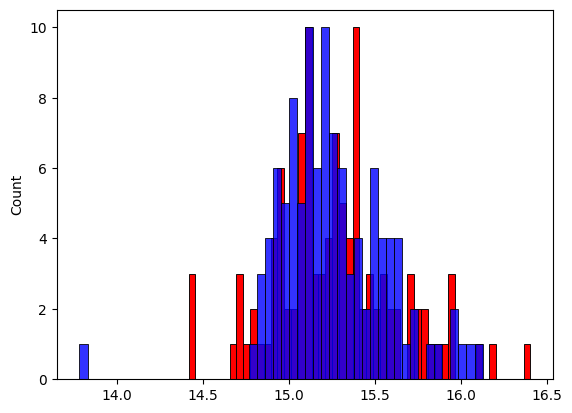

In [155]:
sns.histplot(y_val,bins=50,alpha=1,color='red')
sns.histplot(y_pred_val,bins=50,alpha=0.8,color='blue')

<Axes: ylabel='Count'>

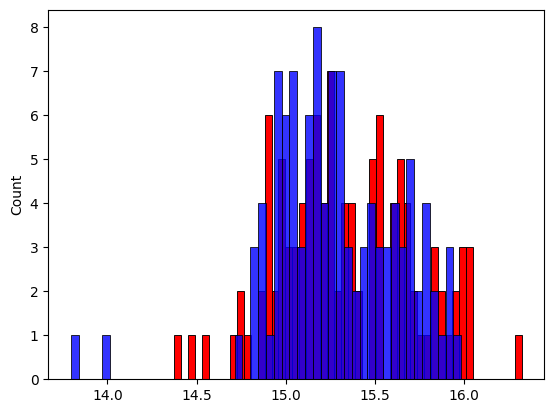

In [157]:
sns.histplot(y_test,bins=50,alpha=1,color='red')
sns.histplot(y_pred_test,bins=50,alpha=0.8,color='blue')

### Using the Model

In [168]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concat([y_train, y_val])

In [169]:
X_full_train = prepare_X_cat(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.0001)
y_pred_full_train = w0 + X_full_train.dot(w)

In [170]:
X_test = prepare_X_cat(df_test)
y_pred_test = w0 + X_test.dot(w)

score_test = rmse(y_test,y_pred_test)
score_test

'32.0778 %'

In [176]:
house = df_test.iloc[50].to_dict()

In [174]:
df_small = pd.DataFrame([house])
X_small = prepare_X_cat(df_small)
y_pred_small = w0 + X_small.dot(w)
np.expm1(y_pred_small[0])

np.float64(5714108.100617604)

In [175]:
np.expm1(y_test[50])

np.float64(7420000.000000001)

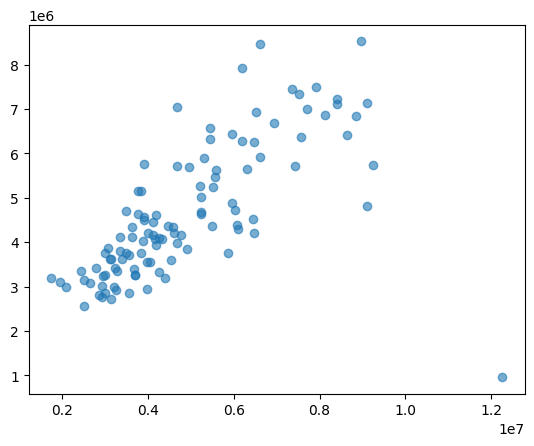

In [178]:
plt.scatter(np.expm1(y_test),np.expm1(y_pred_test),alpha=0.6)
